### Is binary classification really that important?
Let's see a little example

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

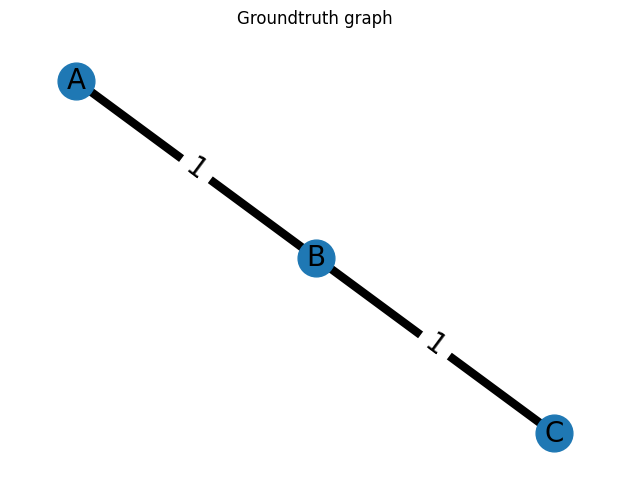

<Figure size 640x480 with 0 Axes>

In [14]:
G = nx.Graph()

G.add_edge("A","B",weight=1)
G.add_edge("B","C",weight=1)


elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=20)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.title("Groundtruth graph")
plt.show()
plt.savefig("binary_path.png")

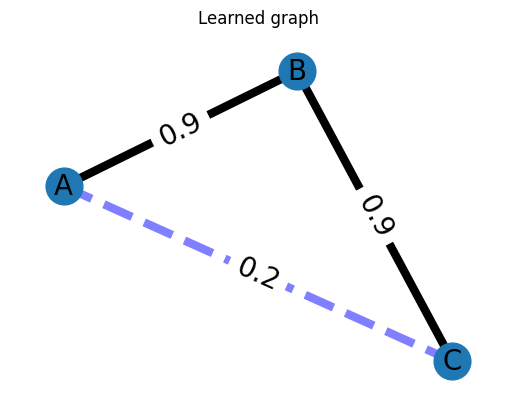

<Figure size 640x480 with 0 Axes>

In [31]:
G = nx.Graph()

G.add_edge("A","B",weight=0.9)
G.add_edge("B","C",weight=0.9)
G.add_edge("A","C",weight=0.2)



elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=20)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.title("Learned graph")
plt.show()
plt.savefig("_path.png")

Nevertheless, even though the two graphs are topologically different, they evolve the signals in equal fashion, we can even measure the MSE of the evolved deltas when deleting the $k$-th least weighted edge in a graph.

In [10]:
import sys
sys.path.insert(1,'..')
import learnHeat as lh
import numpy as np

N = 40

L = lh.heat_graph_RBF(N)
X = lh.create_deltas(L,[1])
res = lh.learn_heat(X,tau0=[1],alpha=0.01,beta=0.1,max_iter=50) 
L_learned = res["L"]    

In [14]:
edges = 2*lh.heat_numedges(L_learned)
aux3 = np.copy(L_learned)

In [15]:
mse = []

for _ in range(int(edges)):
    X2 = lh.create_deltas(L_learned,[1])
    mse.append(np.linalg.norm(X-X2,'fro')**2)
    largest_negative = np.max(L_learned[L_learned<0])
    print(largest_negative)
    L_learned[L_learned==largest_negative]=0

-0.01948949463513935
-0.019489495590035075
-0.01949139797670809
-0.01949139937309626
-0.019550637384174962
-0.019550638453880963
-0.01956003385802946
-0.0195600346382241
-0.01962113877333203
-0.019621138997530003
-0.01962469356966376
-0.019624694964877155
-0.019731313773020297
-0.01973132035898661
-0.019921284604219446
-0.019921285486416928
-0.01999950321997879
-0.019999504549496127
-0.02000711412423724
-0.020007114419426538
-0.020063726531460505
-0.020063732676419307
-0.020088713019211796
-0.020088713309549155
-0.020105058456563626
-0.020105058943543235
-0.020127674796098456
-0.020127675893000883
-0.020133882522883905
-0.02013388299512039
-0.02018141533941027
-0.020181415932581145
-0.02021472322643658
-0.020214724403445652
-0.02025119035573433
-0.020251191804187836
-0.020303220878811562
-0.020303221387951435
-0.020305365367912984
-0.020305365380056065
-0.02031662728755933
-0.02031662796480629
-0.020322672943214323
-0.020322673220880386
-0.02033978557514223
-0.020339785946630516
-0.020

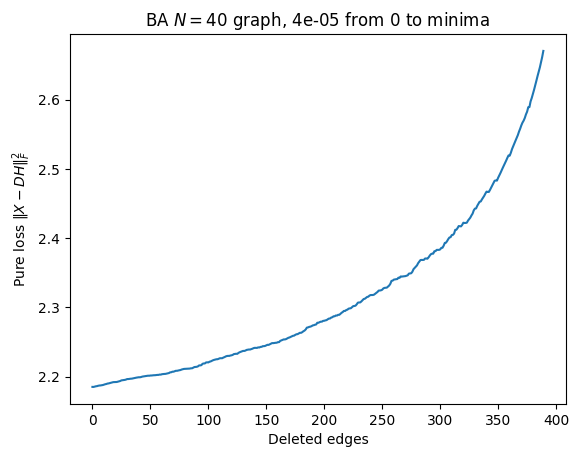

In [16]:
plt.plot(range(int(edges)//2),mse[0::2])
plt.xlabel("Deleted edges")
plt.ylabel(r"Pure loss $\Vert X - DH\Vert_F^2$")
difference = round(abs(mse[0]-min(mse)),5)
plt.title(f"BA $N=40$ graph, {difference} from 0 to minima")
plt.savefig(f"BA_N_40_diff{difference}.png")